In [1]:
# https://coinmarketcap.com/currencies/bitcoin/historical-data/?start=20130428&end=20190702

In [2]:
# import pandas
import pandas as pd

In [43]:
# read history price from html page
bc = pd.read_html('https://coinmarketcap.com/currencies/bitcoin/historical-data/?start=20130428&end=20190702')[0]
bc.head()

,Date,Open*,High,Low,Close**,Volume,Market Cap
0,"Jul 02, 2019",10588.68,10912.19,9737.88,10801.68,31015895223,192206536806
1,"Jul 01, 2019",10796.93,11206.44,10089.31,10583.13,29378589324,188297637574
2,"Jun 30, 2019",11931.99,12178.38,10799.01,10817.16,27256473494,192442065810
3,"Jun 29, 2019",12400.76,12400.91,11508.38,11959.37,29923961128,212739713110
4,"Jun 28, 2019",11162.17,12445.18,10914.49,12407.33,35087757766,220681459666


In [44]:
# convert to datetime data and set index for date time data
bc.Date = pd.to_datetime(bc.Date)
bc = bc.set_index('Date')
bc.head()

,Open*,High,Low,Close**,Volume,Market Cap
Date,,,,,,
2019-07-02,10588.68,10912.19,9737.88,10801.68,31015895223,192206536806
2019-07-01,10796.93,11206.44,10089.31,10583.13,29378589324,188297637574
2019-06-30,11931.99,12178.38,10799.01,10817.16,27256473494,192442065810
2019-06-29,12400.76,12400.91,11508.38,11959.37,29923961128,212739713110
2019-06-28,11162.17,12445.18,10914.49,12407.33,35087757766,220681459666


In [45]:
# sort index so small time at the top
bc.sort_index(inplace=True)
bc.head()

,Open*,High,Low,Close**,Volume,Market Cap
Date,,,,,,
2013-04-28,135.30,135.98,132.10,134.21,-,1488566728
2013-04-29,134.44,147.49,134.00,144.54,-,1603768865
2013-04-30,144.00,146.93,134.05,139.00,-,1542813125
2013-05-01,139.00,139.89,107.72,116.99,-,1298954594
2013-05-02,116.38,125.60,92.28,105.21,-,1168517495


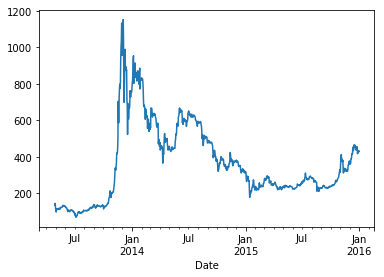

In [12]:
# slice selection after sort_index()
bc.loc['2013':'2015','Close**'].plot()

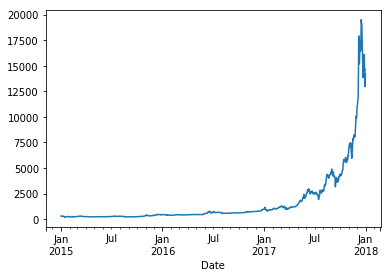

In [14]:
bc.loc['2015':'2017','Close**'].plot()

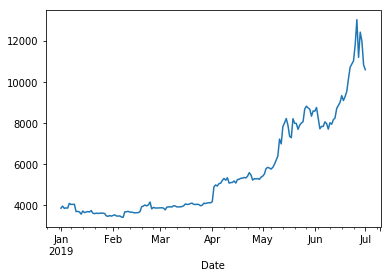

In [98]:
# select one year
%matplotlib inline
bc.loc['2019','Close**'].plot()

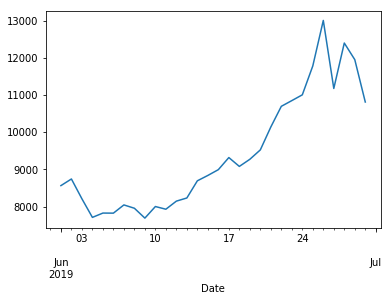

In [63]:
# select one month
bc.loc['2019-6','Close**'].plot()

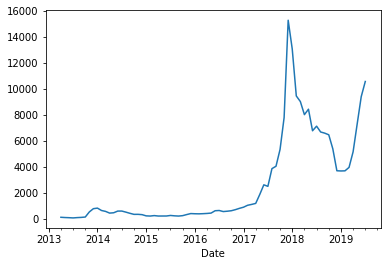

In [22]:
# resample close price with month
bc.resample('M')['Close**'].mean().plot()

In [46]:
# resample volumne with month
# need to remove row with - mean na value
# 
# bc.resample('M')['Volume'].sum().plot()
# filter out no volume
bc = bc[bc['Volume']!='-']


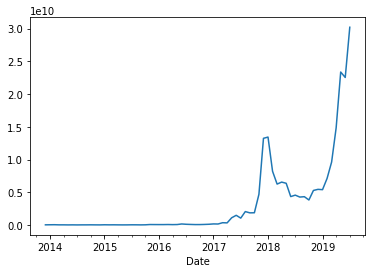

In [49]:
bc.Volume = pd.to_numeric(bc.Volume)
# resample volume with sum() operation
bc.resample('M')['Volume'].mean().plot()

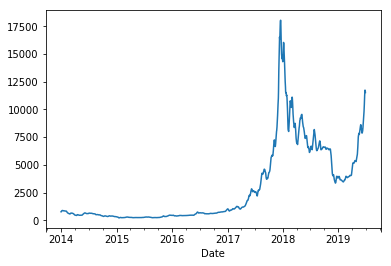

In [54]:
# rolling
bc_7day = bc['Close**'].rolling(7, center=True).mean()
bc_7day.plot()